In [1]:
from IPython.display import display, Markdown
def latexify(x):
    out = '$' + x + '$'
    return out

def lprint(x):
    display(Markdown(latexify(latex(x))))
    
%run -i 'implicit.py'

# Crandall-Rabinowitz

We now have a readily callable implicit function theorem, lets put it to work and automate the method of Crandall-Rabinowitz

Crandall-Rabinowitz pertains to the following case:

$$F : \mathbb{R} \times X \rightarrow Y $$

$$ X = \mathbb{R}^n $$

Where we have that $\partial_{x}F$ has Fredholm index 0 and a one-dimensional kernel.

From this we can recover that:

$$dim X = dim Y$$

and:

$$ \text{dimRange} \;\partial_{x}F = n-1 $$

### Changing basis

To begin to untangle the parts we can deal with the implict function theorem, consider the following bases for $X$ and $Y$:

$(u_{1}, \dots, u_{n-1}, \tilde{u}_{n})$ and $(v_{1}, \dots, v_{n-1}, \tilde{v}_{n})$

such that:

$$ \text{Ker} \;\partial_{x}F = \left< \tilde{u}_{n}\right>$$
$$ \text{Range} \;\partial_{x}F = \left< v_{1}, \cdots, v_{n-1} \right>$$

Let $A$ and $B \in \mathcal{L}(\mathbb{R}^n, \mathbb{R}^n)$ be the respective change of basis matrices

See that $$\tilde{F} = B^{-1} \circ F \circ A$$

Now has one input variable acting in the kernel and one output not in the range, (abusing notation here, $A$,$B$ leave the $\mathbb{R}$ input alone)

### Worked example

To build up the method lets use a previous example:

In [2]:
var('x y z')
var('l', latex_name=r'\lambda')
f1(x,y,z,l) = x*sin(sqrt(x^2 + y^2 +  (pi^2)/9)) - y*cos(sqrt(x^2 + y^2 +  (pi^2)/9)) + exp(z) - 1 # zeros when z = 0
f2(x,y,z,l) = x*cos(l) + y*sin(l) + z 
f3(x,y,z,l) = z^2 + 4*z + z*l + x^2 + y^3 # zeros out at when X = 0   [X = <x,y,z>]
lprint(f1)
lprint(f2)
lprint(f3)

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ -y \cos\left(\frac{1}{3} \, \sqrt{\pi^{2} + 9 \, x^{2} + 9 \, y^{2}}\right) + x \sin\left(\frac{1}{3} \, \sqrt{\pi^{2} + 9 \, x^{2} + 9 \, y^{2}}\right) + e^{z} - 1 $

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ x \cos\left({\lambda}\right) + y \sin\left({\lambda}\right) + z $

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ y^{3} + x^{2} + {\lambda} z + z^{2} + 4 \, z $

In [3]:
J = jacobian([f1,f2,f3],(x,y,z))(x=0,y=0,z=0)
lprint(J)

$ \left(\begin{array}{rrr}
\frac{1}{2} \, \sqrt{3} & -\frac{1}{2} & 1 \\
\cos\left({\lambda}\right) & \sin\left({\lambda}\right) & 1 \\
0 & 0 & {\lambda} + 4
\end{array}\right) $

In [4]:
lprint(det(J))

$ \frac{1}{2} \, \sqrt{3} {\left({\lambda} + 4\right)} \sin\left({\lambda}\right) + \frac{1}{2} \, {\left({\lambda} + 4\right)} \cos\left({\lambda}\right) $

In [5]:
lprint(det(J)(l = -pi/6))

$ 0 $

So we see that $\lambda = - \frac{\pi}{6}$ satisfies the necessary condition for a bifurcation point.

We aim to describe the solution set when $\lambda = -\frac{\pi}{6} $, and determine that it is indeed a bifucation point

But before all that to make things a lot easier lets shift our functions so that we are considering $\lambda = 0$, otherwise the taylor expansions can get very confusing, whatever conclusions we draw about the shifted functions will hold for the originals

In [6]:
old_funcs = [f1,f2,f3]
f1(x,y,z,l) = f1(x,y,z,l-pi/6)
f2(x,y,z,l) = f2(x,y,z,l-pi/6)
f3(x,y,z,l) = f3(x,y,z,l-pi/6)
lprint(f1)
lprint(f2)
lprint(f3)

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ -y \cos\left(\frac{1}{3} \, \sqrt{\pi^{2} + 9 \, x^{2} + 9 \, y^{2}}\right) + x \sin\left(\frac{1}{3} \, \sqrt{\pi^{2} + 9 \, x^{2} + 9 \, y^{2}}\right) + e^{z} - 1 $

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ x \cos\left(-\frac{1}{6} \, \pi + {\lambda}\right) + y \sin\left(-\frac{1}{6} \, \pi + {\lambda}\right) + z $

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ y^{3} + x^{2} - \frac{1}{6} \, {\left(\pi - 6 \, {\lambda}\right)} z + z^{2} + 4 \, z $

Now lets proceed, with the potential bifucation point taken to be $\lambda = 0$

In [7]:
lprint(cos(-pi/6))

$ \frac{1}{2} \, \sqrt{3} $

In [8]:
J = jacobian([f1,f2,f3],(x,y,z))(x=0,y=0,z=0,l=0)
lprint(J)

$ \left(\begin{array}{rrr}
\frac{1}{2} \, \sqrt{3} & -\frac{1}{2} & 1 \\
\frac{1}{2} \, \sqrt{3} & -\frac{1}{2} & 1 \\
0 & 0 & -\frac{1}{6} \, \pi + 4
\end{array}\right) $

In [9]:
K = J.right_kernel().basis()
lprint(K)

$ \left[\left(1,\,\sqrt{3},\,0\right)\right] $

In [10]:
lprint(J.image().basis())

$ \left[\left(1,\,-\frac{1}{3} \, \sqrt{3},\,0\right), \left(0,\,0,\,1\right)\right] $

#### Extending to bases

We can use this trick as per math stackexhange https://math.stackexchange.com/questions/465870/how-to-extend-a-basis

In [11]:
Kperp = matrix(K).right_kernel().basis()
lprint(Kperp)

$ \left[\left(1,\,-\frac{1}{3} \, \sqrt{3},\,0\right), \left(0,\,0,\,1\right)\right] $

#### Orthogonalising the Kernel

In [12]:
A = matrix(K+Kperp).transpose()
lprint(A) # transpose so pick out the kernel direction when multiplied by e_1

$ \left(\begin{array}{rrr}
1 & 1 & 0 \\
\sqrt{3} & -\frac{1}{3} \, \sqrt{3} & 0 \\
0 & 0 & 1
\end{array}\right) $

These are the required matrices for the formulation above

Now we can setup a new function $\tilde{f}$ that behaves as we need to apply the implicit function code - in all but the first slot that is

#### The new f

In [13]:
f1A(x,y,z,l) = f1(*list(A*vector([x,y,z])),l)
f2A(x,y,z,l) = f2(*list(A*vector([x,y,z])),l)
f3A(x,y,z,l) = f3(*list(A*vector([x,y,z])),l)
lprint(f1A)
lprint(f2A)
lprint(f2A)

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ -\frac{1}{3} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \cos\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) + {\left(x + y\right)} \sin\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) + e^{z} - 1 $

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ {\left(x + y\right)} \cos\left(-\frac{1}{6} \, \pi + {\lambda}\right) + \frac{1}{3} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \sin\left(-\frac{1}{6} \, \pi + {\lambda}\right) + z $

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ {\left(x + y\right)} \cos\left(-\frac{1}{6} \, \pi + {\lambda}\right) + \frac{1}{3} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \sin\left(-\frac{1}{6} \, \pi + {\lambda}\right) + z $

In [14]:
Ja = jacobian([f1A,f2A,f3A],(x,y,z))(x=0,y=0,z=0,l=0)
lprint(Ja)

$ \left(\begin{array}{rrr}
0 & \frac{2}{3} \, \sqrt{3} & 1 \\
0 & \frac{2}{3} \, \sqrt{3} & 1 \\
0 & 0 & -\frac{1}{6} \, \pi + 4
\end{array}\right) $

We see that the kernel direction is no restricted to one canonical coordinate direction

### Orthogonalising the Image

In [15]:
I = Ja.image().basis()
I = [Ja*vec for vec in I]
lprint(I)

$ \left[\left(\frac{2}{3} \, \sqrt{3},\,\frac{2}{3} \, \sqrt{3},\,0\right), \left(1,\,1,\,-\frac{1}{6} \, \pi + 4\right)\right] $

In [16]:
Iperp = matrix(I).right_kernel().basis()
lprint(Iperp)

$ \left[\left(1,\,-1,\,0\right)\right] $

In [17]:
B = matrix(I + Iperp).transpose().inverse()

In [18]:
lprint(B)

$ \left(\begin{array}{rrr}
\frac{1}{4} \, \sqrt{3} & \frac{1}{4} \, \sqrt{3} & \frac{3 \, \sqrt{3}}{\pi - 24} \\
0 & 0 & -\frac{6}{\pi - 24} \\
\frac{1}{2} & -\frac{1}{2} & 0
\end{array}\right) $

In [19]:
[ft1,ft2,ft3] = B*vector([f1A,f2A,f3A])
lprint(ft1)
lprint(ft2)
lprint(ft3)

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ \frac{1}{12} \, \sqrt{3} {\left(3 \, {\left(x + y\right)} \cos\left(-\frac{1}{6} \, \pi + {\lambda}\right) + {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \sin\left(-\frac{1}{6} \, \pi + {\lambda}\right) + 3 \, z\right)} - \frac{1}{12} \, \sqrt{3} {\left({\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \cos\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) - 3 \, {\left(x + y\right)} \sin\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) - 3 \, e^{z} + 3\right)} + \frac{\sqrt{3} {\left(2 \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)}^{3} + 54 \, {\left(x + y\right)}^{2} - 9 \, {\left(\pi - 6 \, {\lambda}\right)} z + 54 \, z^{2} + 216 \, z\right)}}{18 \, {\left(\pi - 24\right)}} $

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ -\frac{2 \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)}^{3} + 54 \, {\left(x + y\right)}^{2} - 9 \, {\left(\pi - 6 \, {\lambda}\right)} z + 54 \, z^{2} + 216 \, z}{9 \, {\left(\pi - 24\right)}} $

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ -\frac{1}{2} \, {\left(x + y\right)} \cos\left(-\frac{1}{6} \, \pi + {\lambda}\right) - \frac{1}{6} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \cos\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) - \frac{1}{6} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \sin\left(-\frac{1}{6} \, \pi + {\lambda}\right) + \frac{1}{2} \, {\left(x + y\right)} \sin\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) - \frac{1}{2} \, z + \frac{1}{2} \, e^{z} - \frac{1}{2} $

In [20]:
Jt = jacobian([ft1,ft2,ft3],(x,y,z))(x=0,y=0,z=0,l=0)
lprint(Jt)

$ \left(\begin{array}{rrr}
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 0
\end{array}\right) $

In [21]:
Kt = Jt.right_kernel().basis()
lprint(Kt)

$ \left[\left(1,\,0,\,0\right)\right] $

In [22]:
It = Jt.image().basis()
lprint(It)

$ \left[\left(0,\,1,\,0\right), \left(0,\,0,\,1\right)\right] $

Success! - we see that now the kernel and image directions are teased out.

### Running the implicit function code

The implicit function method only works for the case when the $f_{Y}$ partial is invertible, in this case that means we omit $\lambda$ and the kernel direction, which for our $\tilde{f}$ means ingnoring $x$

Similarly we omit $\tilde{f}_{1}$ from consideration from the implicit function theorem, since this traverses the cokernel of the Jacobian

Translating into the language of the implicit function theorem code, somewhat confusingly we set:

$y_{1} = y$

$y_{2} = z$

$x_{1} = \lambda$

$x_{2} = x$


In [23]:
funcs = [ft1, ft2]
position = {'x' : 0, 'y' : 0, 'z' : 0, 'l' : 0} # drawback that have to write this way
var_dict = {'y1' : y, 'y2' : z, 'x1' : l, 'x2' : x}
x_var_keys = ['x1','x2']
x_dim = 2
y_dim = 2

In [24]:
t_dict = TensorDict(funcs, position, var_dict, x_dim, y_dim)

computing Taylor approximaton to 3 order for speedup


In [25]:
out = get_hkx_polynomial(funcs, 2, x_dim, y_dim, var_dict, x_var_keys, t_dict, position)

100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


[1 0]
[0 1]


100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

[1 0]
[0 1]


In [26]:
lprint(out)

$ \left[-\frac{3 \, {\left(\pi - 24\right)} {\lambda} x}{2 \, {\left(\sqrt{3} \pi - 24 \, \sqrt{3}\right)}} - \frac{9 \, x^{2}}{\sqrt{3} \pi - 24 \, \sqrt{3}}, \frac{6 \, x^{2}}{\pi - 24}\right] $

In [27]:
lprint(ft3)

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ -\frac{1}{2} \, {\left(x + y\right)} \cos\left(-\frac{1}{6} \, \pi + {\lambda}\right) - \frac{1}{6} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \cos\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) - \frac{1}{6} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \sin\left(-\frac{1}{6} \, \pi + {\lambda}\right) + \frac{1}{2} \, {\left(x + y\right)} \sin\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) - \frac{1}{2} \, z + \frac{1}{2} \, e^{z} - \frac{1}{2} $

In [28]:
latex(ft3)

\left( x, y, z, {\lambda} \right) \ {\mapsto} \ -\frac{1}{2} \, {\left(x + y\right)} \cos\left(-\frac{1}{6} \, \pi + {\lambda}\right) - \frac{1}{6} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \cos\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) - \frac{1}{6} \, {\left(3 \, \sqrt{3} x - \sqrt{3} y\right)} \sin\left(-\frac{1}{6} \, \pi + {\lambda}\right) + \frac{1}{2} \, {\left(x + y\right)} \sin\left(\frac{1}{3} \, \sqrt{\pi^{2} + 36 \, x^{2} + 12 \, y^{2}}\right) - \frac{1}{2} \, z + \frac{1}{2} \, e^{z} - \frac{1}{2}

This is the parametrisation of the zero set of the 2nd and 3rd compoments of $\tilde{F} = B^{-1} \circ F \circ A$, lets substitute into the first equation, we'll only require the first two terms in its taylor expansion

In [29]:
lprint(taylor(ft3,(x,0), (y,0), (z,0), (l, 0), 3)) # 3rd order seems necessary

$ \left( x, y, z, {\lambda} \right) \ {\mapsto} \ -{\lambda} x + \frac{1}{4} \, z^{2} + \frac{2 \, \sqrt{3} \pi {\lambda}^{2} y + \pi z^{3} + 72 \, x^{3} + 24 \, x y^{2}}{12 \, \pi} $

In [30]:
#ft1_taylor = ft1.taylor(*[(key,value) for key,value in position.items() if key != 'l'], 2)(l = -pi/6)
ft3_taylor = ft3.taylor(*[(key,value) for key,value in position.items()],4)
# unpacking the position we take the expansion at
lprint(ft3_taylor.polynomial(SR))

$ \frac{1}{6} l^{3} x + \frac{1}{48} z^{4} + \frac{6}{\pi} x^{3} + \left(\frac{1}{6} \, \sqrt{3}\right) l^{2} y + \frac{2}{\pi} x y^{2} + \frac{1}{12} z^{3} - l x + \frac{1}{4} z^{2} $

In [31]:
ft3_sub = ft3_taylor(y = out[0], z = out[1])
#lprint(ft3_sub.polynomial(SR))

In [32]:
#latex(ft3_sub.polynomial(SR))

In [33]:
local = sum([a[0]*a[1] for a in ft3_sub.polynomial(SR) if a[1].degree() <= 2])
lprint(local)

$ -l x $

In [34]:
latex(local)

-l x

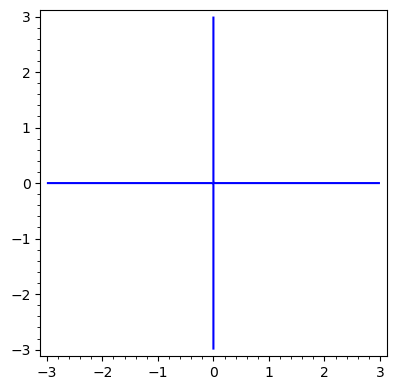

In [35]:
implicit_plot(local, (-3,3), (-3,3))

The solution set of this will locally approximate the full solution set, we see that the trivial solution is still preserved for $x,y,z = 0$

We see that $\lambda = 0$ is a potential solution approximation, and will be close to a true bifurcation. Why? regardless of what happens in the higher order terms, the value of $\lambda$ can be adjusted to accomodate, since the $\lambda x$ term dominates close to the bifurcation point

So we see that we can find an approximation of a solution for the set of equations dependant on $\lambda$

Lets try evaluating at $\lambda = 0, x = 0.1$

In [36]:
phi = out

In [37]:
eps = 0.01

y_est = phi[0](x = eps, l = 0)
z_est = phi[1](x = eps, l = 0)

print(float(ft1(eps, y_est, z_est, 0)))
print(float(ft2(eps, y_est, z_est, 0)))
print(float(ft3(eps, y_est, z_est, 0)))

2.3832034103186824e-07
1.634707100460723e-06
1.9098957265272637e-06


A sucess! lets try to incorporate the cubic adjustment

In [38]:
out = get_hkx_polynomial(funcs, 3, x_dim, y_dim, var_dict, x_var_keys, t_dict, position)

100%|██████████| 1/1 [00:00<00:00, 248.18it/s]


[1 0]
[0 1]


100%|██████████| 4/4 [00:00<00:00, 20.19it/s]


[1 0]
[0 1]


100%|██████████| 14/14 [00:03<00:00,  4.24it/s]


[1 0]
[0 1]


In [39]:
ft3_sub = ft3_taylor(y = out[0], z = out[1])

In [40]:
#lprint(local)
local = sum([a[0]*a[1] for a in ft3_sub.polynomial(SR) if a[1].degree() <= 3])

In [41]:
lprint(local)

$ \frac{6}{\pi} x^{3} - l x $

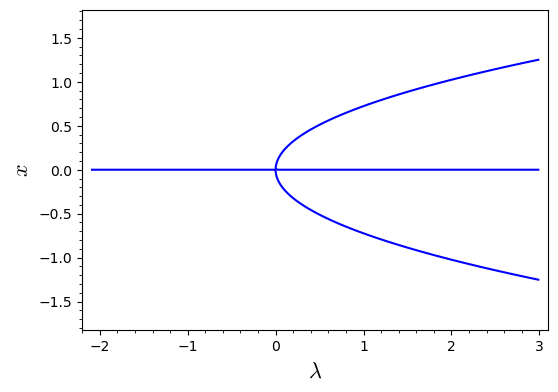

In [42]:
implicit_plot(local, (-2.1,3), (-1.75,1.75), axes_labels=[r'$\lambda$', r'$x$'])

In [43]:
better = symbolic_expression(local).full_simplify().solve(l)
#lprint(better)

In [44]:
phi = out

In [45]:
lprint(better)

$ \left[{\lambda} = \frac{6 \, x^{2}}{\pi}\right] $

In [46]:
l_est = float(better[0].right()(x = eps))
y_est = float(phi[0](x = eps, l = l_est))
z_est = float(phi[1](x = eps, l = l_est))

In [47]:
print(float(ft1(eps, y_est, z_est, l_est)))
print(float(ft2(eps, y_est, z_est, l_est)))
print(float(ft3(eps, y_est, z_est, l_est)))

1.1792126274142682e-07
-1.3610204373291223e-07
6.221208791179489e-11


Interestingly we see that now only the $\tilde{f}_{3}$ error has significantly reduced, this suggest that for further improvements for the others we need to to a bigger taylor expansion right at the start

## Converting back

Now we need to translate this all back to the original problem

Lets try to paramtrise by $x = t$, using the third order approximation for lambda for most precision available

Take $t = 0.1$

This parametrises the solutions of $\tilde{F} = B^{-1} \circ F \circ A$, by invertibility of $B$ we see that these also are the solutions of $F \circ A$, so premultiplication by $A$ will yield the new solution set:

In [49]:
l_est = better[0].right()
xt_est = x
yt_est = out[0](x = xt_est, l = l_est)
zt_est = out[1](x = xt_est, l = l_est)

In [50]:
[x_est, y_est, z_est] = list(A*vector([xt_est,yt_est,zt_est]))

In [51]:
x_est1 = x_est(x = eps)
y_est1 = y_est(x = eps)
z_est1 = z_est(x = eps)
l_est1 = l_est(x = eps)
print(float(f1(x_est1, y_est1, z_est1, l_est1)))
print(float(f2(x_est1, y_est1, z_est1, l_est1)))
print(float(f3(x_est1, y_est1, z_est1, l_est1)))

1.2391393119925986e-10
-5.102544882403431e-13
-4.7314531147663847e-07


Perfect - we have translated back, the method documented above allows us to do this to arbitrary precision :)